In [1]:
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.realpath("__file__")), '..', 'src')))  # append parent directory to search path
from patterns.visualizer import Visualizer

Bring in data from database and annotate it with *locc*, *locc+*, *locc-*, *change-size-cos* = *1-similarity* (**expensive call**)

In [2]:
vis = Visualizer(project_name='lammps', db_pwd=getpass.getpass(prompt='Database password:'))
vis.get_data()

Database password: ·······


In [3]:
all_commits = vis.commit_data
all_commits.head()

,sha,branch,author,message,filepath,diff,year,month,day,doy,dow,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,,,,,,,
2021-02-22 04:05:20,f3ee948450bbc63eef80c3bad1a2de382dda7b75,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,need to use column 1 in fix ave/time example,doc/src/compute_temp_chunk.rst,- fix 1 all ave/time 100 1 100 c_myChunk fil...,2021,2,22,53,Monday,2,1,1,0.022992
2021-02-21 17:40:11,4786391fad023faaa676de5957cd3ea7d3ead24f,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,must explicitly register fix gpu,cmake/Modules/Packages/GPU.cmake,+RegisterFixStyle(${GPU_SOURCES_DIR}/fix_gpu.h),2021,2,21,52,Sunday,0,0,0,0.000000
2021-02-21 14:11:38,e0e89c588ba0c907f60824806dcf5ea84e8090d5,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,correct library prefix name use also for build...,cmake/Modules/YAML.cmake,- BUILD_BYPRODUCTS <INSTAL...,2021,2,21,52,Sunday,2,1,1,0.117220
2021-02-21 13:42:30,db95552f2b4c28c630c5c9a35b3a83b7892e990e,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,update md5sum for updated archive (again),cmake/Modules/OpenCLLoader.cmake,- URL_MD5 d89ab1dc1...,2021,2,21,52,Sunday,2,1,1,0.208333
2021-02-21 13:21:45,1a68d761a3060cfd7c8ead56b495df070a847a23,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,correct how to construct the path to the gener...,cmake/Modules/OpenCLLoader.cmake,- BUILD_BYPRODUCTS <BINARY_...,2021,2,21,52,Sunday,3,2,1,0.287205


## Remove all noncode files
The determination of what is code is made by including common suffixes, as well as checking manually a sampling of ECP projects for the suffixes used for things that can be labeled as code (vs. input simulation data, documentation, or generated files).

In [4]:
vis.remove_noncode()
print("Removed %d noncode files!" % (all_commits.shape[0] - vis.commit_data.shape[0]))
vis.commit_data.head()

Removed 71594 noncode files!


,sha,branch,author,message,filepath,diff,year,month,day,doy,dow,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,,,,,,,
2021-02-21 17:40:11,4786391fad023faaa676de5957cd3ea7d3ead24f,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,must explicitly register fix gpu,cmake/Modules/Packages/GPU.cmake,+RegisterFixStyle(${GPU_SOURCES_DIR}/fix_gpu.h),2021,2,21,52,Sunday,0,0,0,0.000000
2021-02-21 14:11:38,e0e89c588ba0c907f60824806dcf5ea84e8090d5,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,correct library prefix name use also for build...,cmake/Modules/YAML.cmake,- BUILD_BYPRODUCTS <INSTAL...,2021,2,21,52,Sunday,2,1,1,0.117220
2021-02-21 13:42:30,db95552f2b4c28c630c5c9a35b3a83b7892e990e,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,update md5sum for updated archive (again),cmake/Modules/OpenCLLoader.cmake,- URL_MD5 d89ab1dc1...,2021,2,21,52,Sunday,2,1,1,0.208333
2021-02-21 13:21:45,1a68d761a3060cfd7c8ead56b495df070a847a23,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,correct how to construct the path to the gener...,cmake/Modules/OpenCLLoader.cmake,- BUILD_BYPRODUCTS <BINARY_...,2021,2,21,52,Sunday,3,2,1,0.287205
2021-02-21 13:20:36,06f6766ed6dab0ac18607ea9ee9d237a09569716,* master\n remotes/origin/HEAD -> origin/mast...,Axel Kohlmeyer,CMAKE_FIND_LIBRARY_PREFIXES is a path. must us...,cmake/Modules/GTest.cmake,- BUILD_BYPRODUCTS <BINARY_...,2021,2,21,52,Sunday,8,4,4,0.104598


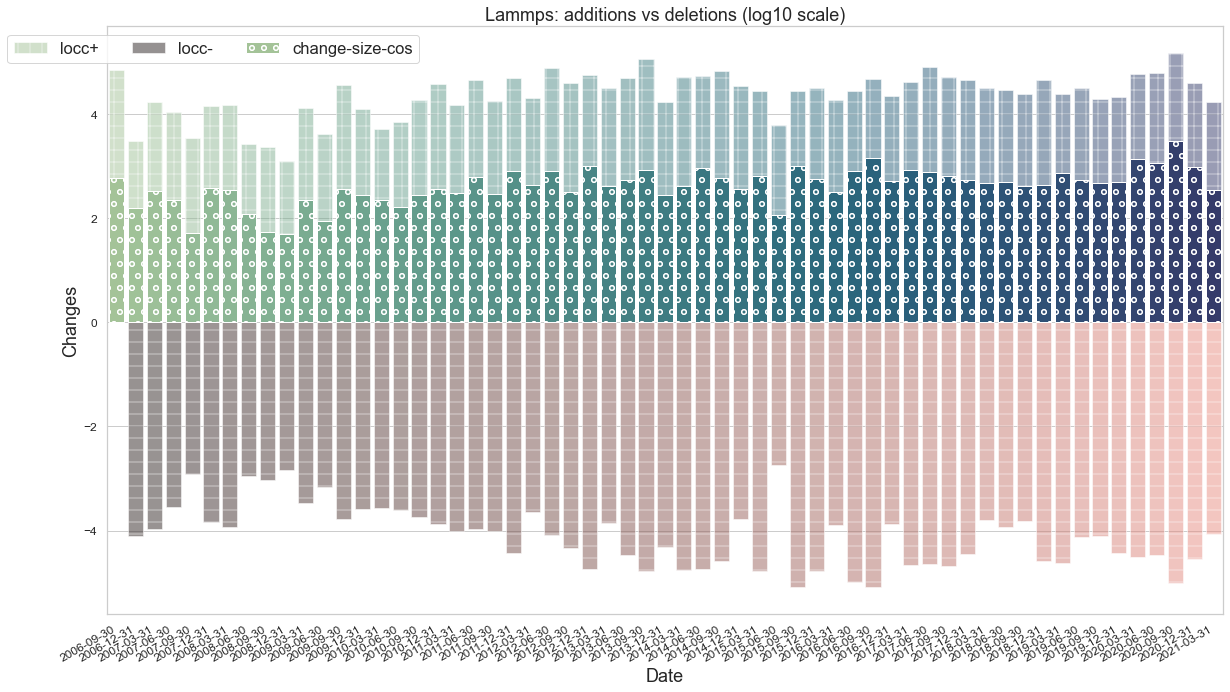

In [5]:
df = vis.plot_overall_project_locc(time_range=None, log=True)

to focus on a given year and/or month, set *year* and *month* fields

In [6]:
vis.set_year(2020)
vis.set_month(7)

to plot for a given year, provide *time_range='year'*

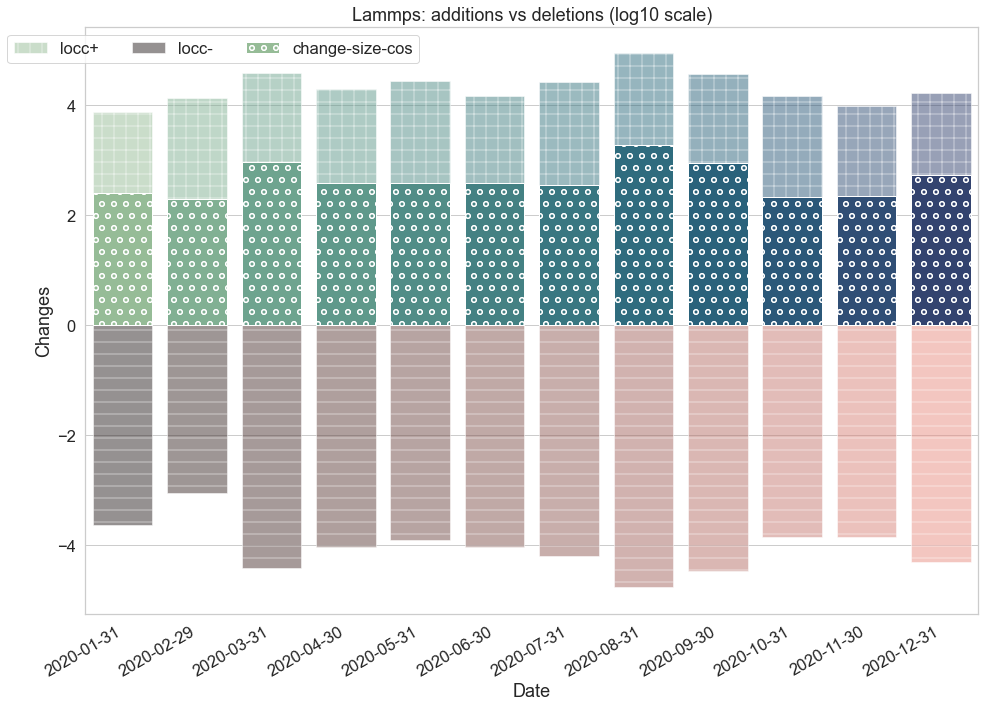

In [7]:
df = vis.plot_overall_project_locc(time_range='year',log=True)

similarly to plot for a given month, set *time_range='month'*

,year,month,day,doy,locc,locc-,locc+,change-size-cos,date
datetime,,,,,,,,,
2020-07-01,26260,91,13,2379,137,-1.612784,1.982271,0.928952,2020-07-01
2020-07-02,98980,343,98,9016,472,-2.350248,2.394452,1.223762,2020-07-02
2020-07-03,32320,112,48,2960,210,-1.653213,2.217484,1.050881,2020-07-03
2020-07-04,177760,616,352,16368,2881,-2.673942,3.381837,1.707004,2020-07-04
2020-07-05,34340,119,85,3179,510,-2.252853,2.519828,0.805336,2020-07-05
2020-07-06,58580,203,174,5452,800,-2.176091,2.812913,1.317511,2020-07-06
2020-07-07,197960,686,686,18522,1630,-2.542825,3.107549,1.480651,2020-07-07
2020-07-08,157560,546,624,14820,502,-1.949390,2.615950,1.791581,2020-07-08
2020-07-09,64640,224,288,6112,1860,-2.564666,3.174060,1.119974,2020-07-09


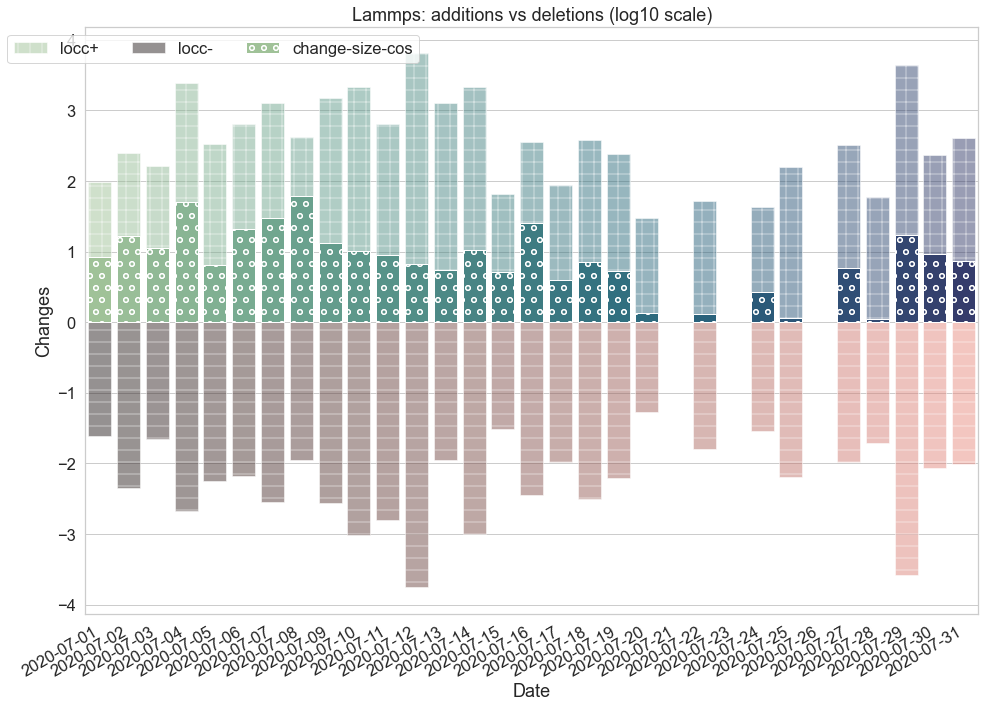

In [8]:
vis.plot_overall_project_locc(time_range='month',log=True)

### Averages: Total changed lines over time

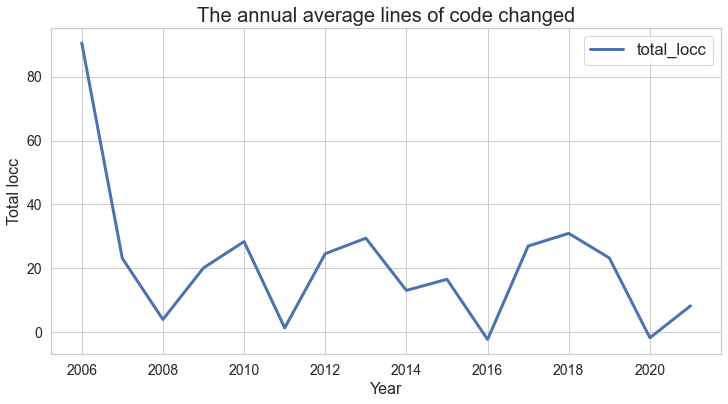

In [9]:
vis.plot_total_locc_avg()

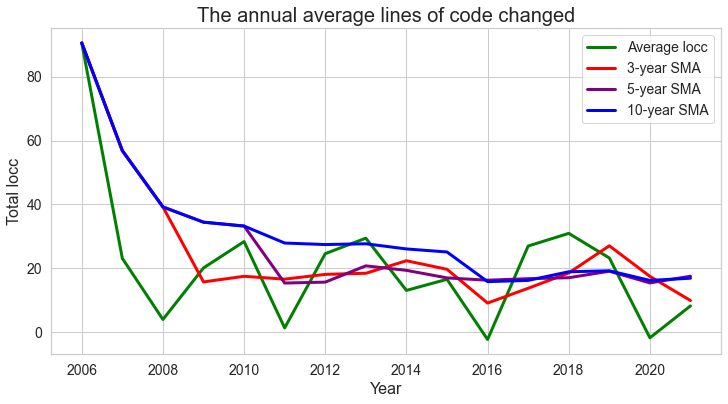

In [10]:
vis.plot_total_locc_moving_avgs()

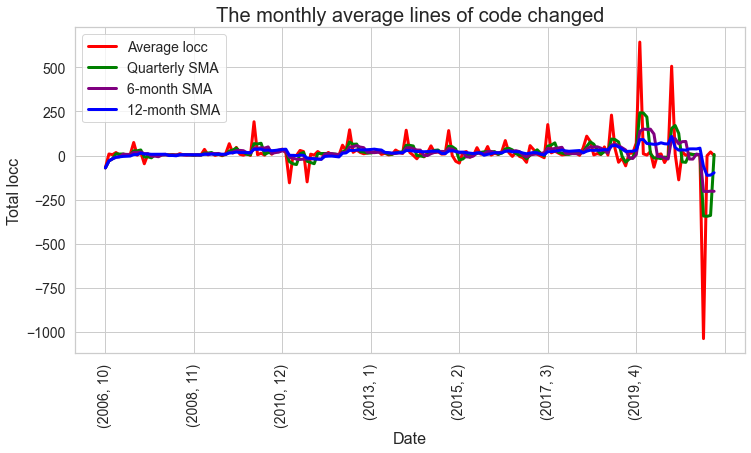

In [11]:
vis.plot_total_locc_moving_avgs_M()

## Total changed lines over time
This reflects changed lines of code as reported in git commit diffs.

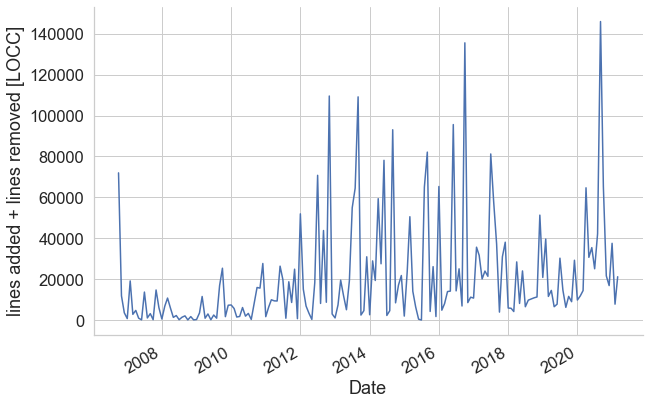

In [12]:
df = vis.plot_project_locc_line()

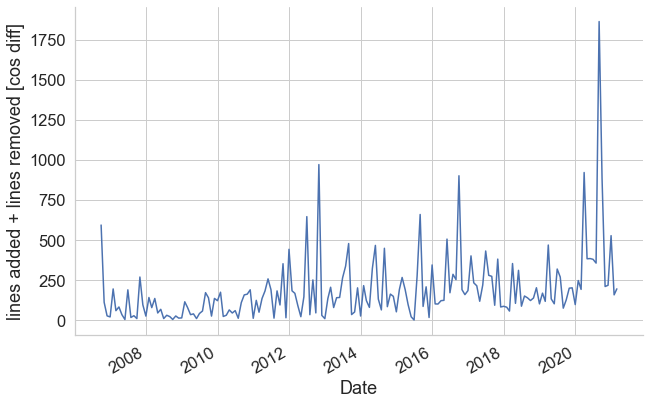

In [13]:
df2 = vis.plot_project_locc_line(locc=False)

,year,month,day,doy,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,
2006-09-30 00:00:00+00:00,1203600,5400,16201,162001,71981,0,71981,593.000000
2006-10-31 00:00:00+00:00,254762,1270,937,35608,11815,11590,225,110.514378
2006-11-30 00:00:00+00:00,116348,638,503,18135,3509,1223,2286,25.697748
2006-12-31 00:00:00+00:00,96288,576,609,16641,695,176,519,19.418004
2007-01-31 00:00:00+00:00,1029591,513,14849,14849,19118,7173,11945,194.033084


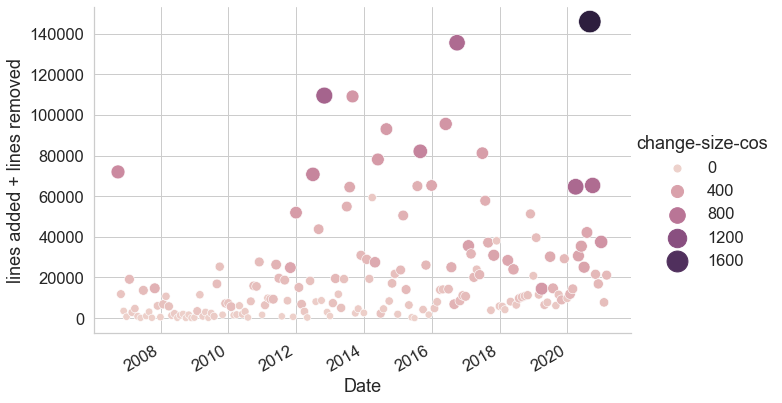

In [14]:
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df2, x="datetime", y="locc", size="change-size-cos", hue="change-size-cos", sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

### Using a distance metric to adjust the size of the changes

We use the python [textdistance](https://github.com/life4/textdistance) module. The following algorithms have been integrated with the visualizer.
```
'cos', 'hamming', 'damerau_levenshtein', 'jaccard', 'jaro', 'jaro_winkler', 'bag', 'editex'
```

,year,month,day,doy,locc,locc-,locc+,change-size-cos,change-size-jaccard
datetime,,,,,,,,,
2006-09-30 00:00:00+00:00,1203600,5400,16201,162001,71981,0,71981,593.000000,593.000000
2006-10-31 00:00:00+00:00,254762,1270,937,35608,11815,11590,225,110.514378,113.070984
2006-11-30 00:00:00+00:00,116348,638,503,18135,3509,1223,2286,25.697748,31.616458
2006-12-31 00:00:00+00:00,96288,576,609,16641,695,176,519,19.418004,22.886859
2007-01-31 00:00:00+00:00,1029591,513,14849,14849,19118,7173,11945,194.033084,236.788836


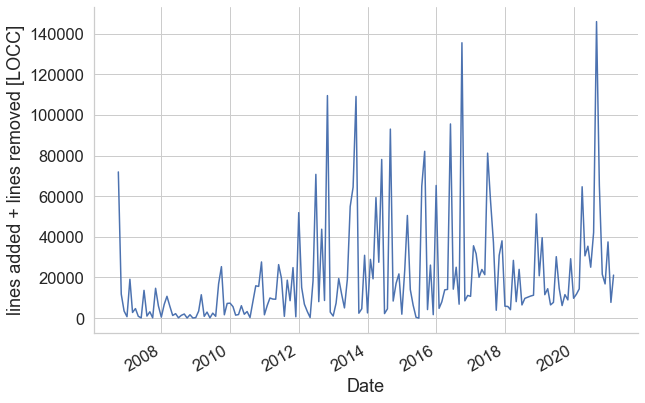

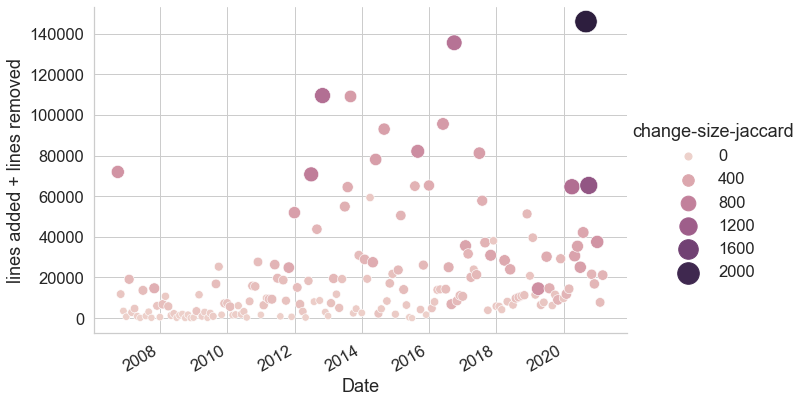

In [15]:
diff_alg = 'jaccard'
df = vis.plot_project_locc_line(diff_alg=diff_alg, log=False)
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df, x="datetime", y="locc", size="change-size-%s" % diff_alg, hue="change-size-%s" % diff_alg, sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

## Change size over time

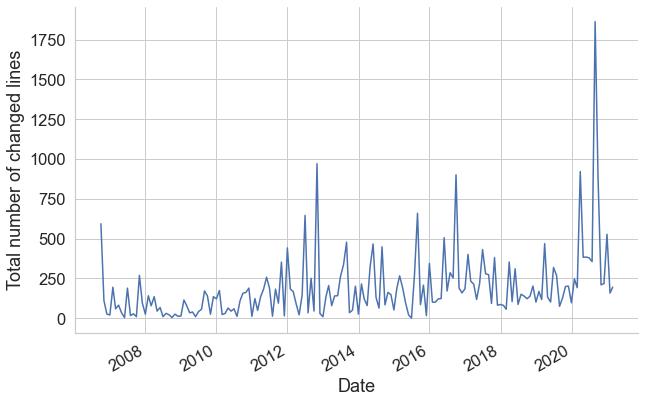

In [16]:
df = vis.plot_proj_change_size(time_range=None)

Similarly, we can 'zoom' into a specific year

(                              year  month    day      doy    locc  locc-  \
 datetime                                                                   
 2020-01-31 00:00:00+00:00  1298860    643  12090    12090   11833   4413   
 2020-02-29 00:00:00+00:00   618120    612   5203    14689   14400   1150   
 2020-03-31 00:00:00+00:00  5013640   7446  54429   203349   64676  26002   
 2020-04-30 00:00:00+00:00  2026060   4012  16841   108114   30658  10815   
 2020-05-31 00:00:00+00:00  1708920   4230  15812   118178   35406   8003   
 2020-06-30 00:00:00+00:00  2050300   6090  15142   169422   25061  10806   
 2020-07-31 00:00:00+00:00  1888700   6545  11330   181500   42171  15697   
 2020-08-31 00:00:00+00:00  8558740  33896  94688   997169  146001  58933   
 2020-09-30 00:00:00+00:00  9776800  43560  49204  1230164   65329  29199   
 2020-10-31 00:00:00+00:00  3878400  19200  37672   563752   21593   7301   
 2020-11-30 00:00:00+00:00  1018080   5544   8130   161850   16839   7301   

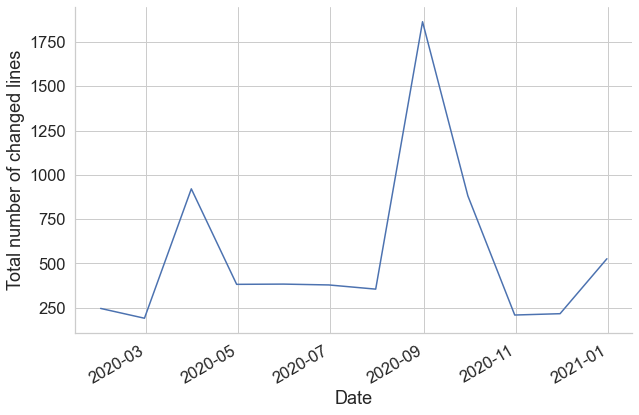

In [17]:
vis.plot_proj_change_size(time_range='year')

Or a specific year range

(                              year  month    day      doy    locc  locc-  \
 datetime                                                                   
 2018-01-31 00:00:00+00:00   294628    146   2087     2087    5729    779   
 2018-02-28 00:00:00+00:00   314808    312   2685     7521    4149    802   
 2018-03-31 00:00:00+00:00  2538644   3774  15987    90209   28424   4714   
 2018-04-30 00:00:00+00:00  3194494   6332  36938   179408    8106   1941   
 2018-05-31 00:00:00+00:00  3594058   8905  37667   251387   24008   5136   
 2018-06-30 00:00:00+00:00   439924   1308   4217    37135    6490   1601   
 2018-07-31 00:00:00+00:00   643742   2233   4868    62607    9720   1764   
 2018-08-31 00:00:00+00:00  1511482   5992  16218   175006   10309   2431   
 2018-09-30 00:00:00+00:00   760786   3393   4343    95954   10851   2238   
 2018-10-31 00:00:00+00:00   595310   2950   4603    85138   11271   1995   
 2018-11-30 00:00:00+00:00   938370   5115   7117   148477   51306  21404   

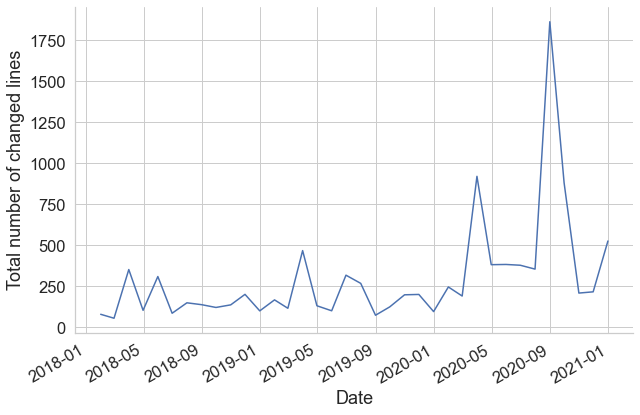

In [18]:
vis.select_year_range(2018,2020)
vis.plot_proj_change_size(time_range='year-year')

we can zoom into a month

(                             year  month   day    doy   locc  locc-  locc+  \
 datetime                                                                     
 2020-07-01 00:00:00+00:00   26260     91    13   2379    137     41     96   
 2020-07-02 00:00:00+00:00   98980    343    98   9016    472    224    248   
 2020-07-03 00:00:00+00:00   32320    112    48   2960    210     45    165   
 2020-07-04 00:00:00+00:00  177760    616   352  16368   2881    472   2409   
 2020-07-05 00:00:00+00:00   34340    119    85   3179    510    179    331   
 2020-07-06 00:00:00+00:00   58580    203   174   5452    800    150    650   
 2020-07-07 00:00:00+00:00  197960    686   686  18522   1630    349   1281   
 2020-07-08 00:00:00+00:00  157560    546   624  14820    502     89    413   
 2020-07-09 00:00:00+00:00   64640    224   288   6112   1860    367   1493   
 2020-07-10 00:00:00+00:00   54540    189   270   5184   3191   1047   2144   
 2020-07-11 00:00:00+00:00   40400    140   220   38

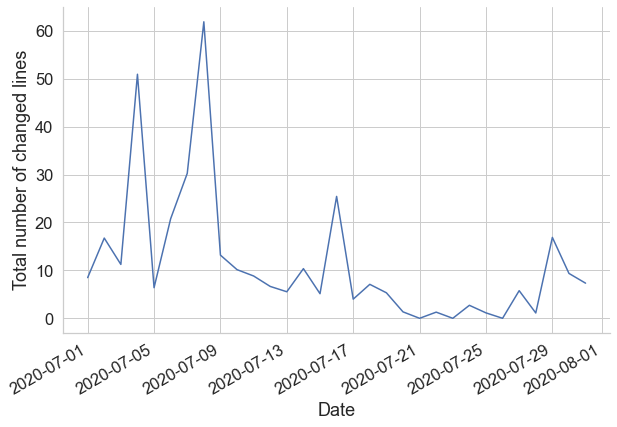

In [19]:
vis.plot_proj_change_size(time_range='month')

Or a month range

(                              year  month    day      doy    locc  locc-  \
 datetime                                                                   
 2018-05-31 00:00:00+00:00  3594058   8905  37667   251387   24008   5136   
 2018-06-30 00:00:00+00:00   439924   1308   4217    37135    6490   1601   
 2018-07-31 00:00:00+00:00   643742   2233   4868    62607    9720   1764   
 2018-08-31 00:00:00+00:00  1511482   5992  16218   175006   10309   2431   
 2018-09-30 00:00:00+00:00   760786   3393   4343    95954   10851   2238   
 2018-10-31 00:00:00+00:00   595310   2950   4603    85138   11271   1995   
 2018-11-30 00:00:00+00:00   938370   5115   7117   148477   51306  21404   
 2018-12-31 00:00:00+00:00        0      0      0        0       0      0   
 2019-01-31 00:00:00+00:00        0      0      0        0       0      0   
 2019-02-28 00:00:00+00:00        0      0      0        0       0      0   
 2019-03-31 00:00:00+00:00        0      0      0        0       0      0   

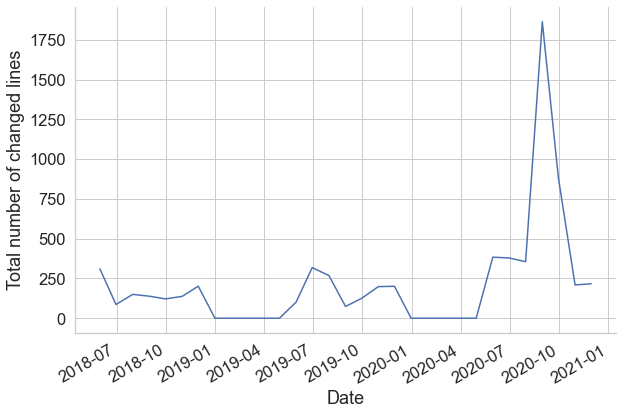

In [20]:
vis.select_month_range(5,11)
vis.plot_proj_change_size(time_range='month-month')

## More patterns
Here we look at a combination of the the high-churn and domain champion patterns. Basically we are focusing on the files that have the most changes and restricting the developers by those with the biggest contributions.

author,sjplimp,Stan Moore,Axel Kohlmeyer,stamoor,Steve Plimpton,tomswinburne,pscrozi,Richard Berger,julient31,Anne Gunn
filepath,,,,,,,,,,
lib/kokkos/tpls...st/gtest-all.cc,0,44343,0,9854,0,0,0,0,0,0
lib/kokkos/tpls...t/gtest/gtest.h,0,105462,0,23436,0,0,0,0,0,0
src/KSPACE/pppm.cpp,39002,3,1192,1,381,318,3668,0,6,120
src/KSPACE/pppm_disp.cpp,31334,2,376,0,80,36,4,0,0,420
src/MANYBODY/pair_bop.cpp,20944,0,736,0,4,853,0,693,0,460


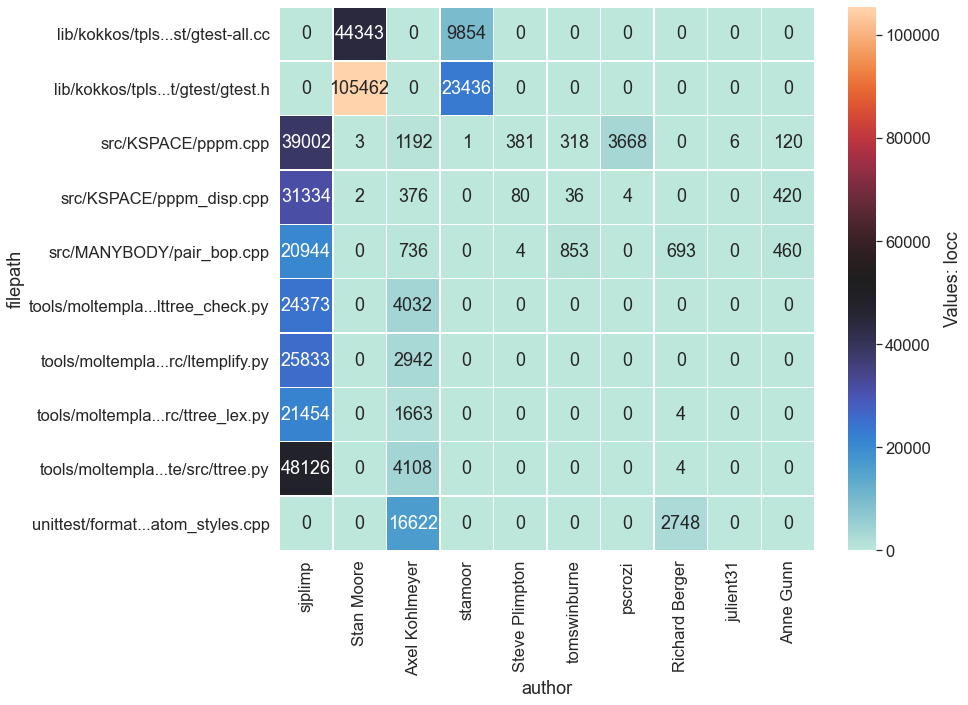

In [21]:
N = 10
vis.set_max_label_length(30)
top_N = vis.plot_top_N_heatmap(N, value_column='locc')
top_N.head()

author,sjplimp,Axel Kohlmeyer,Stan Moore,Steve Plimpton,stamoor,Richard Berger,Anne Gunn,julient31,tomswinburne,Sebastian Hütter
filepath,,,,,,,,,,
lib/kokkos/core...Right_Rank5.cpp,0.0,0.0,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lib/kokkos/core...Right_Rank8.cpp,0.0,0.0,94.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lib/kokkos/core...tLeft_Rank8.cpp,0.0,0.0,94.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lib/kokkos/core...tride_Rank4.cpp,0.0,0.0,83.902565,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lib/kokkos/core...tride_Rank5.cpp,0.0,0.0,87.889797,0.0,0.0,0.0,0.0,0.0,0.0,0.0


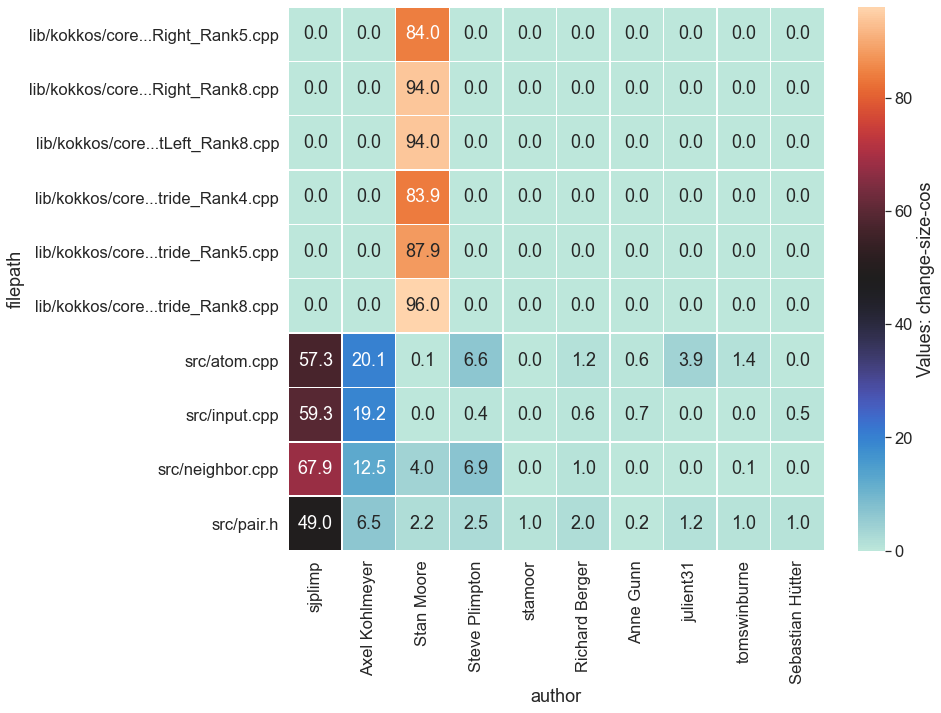

In [22]:
import seaborn as sns
top_N = vis.plot_top_N_heatmap(N, value_column='change-size-cos')
top_N.head()

In [23]:
from patterns.patterns import Patterns
df = vis.commit_data

In [24]:
vis.reset()
vis.annotate_metrics(diff_alg='cos')
file_dev_locc = vis.make_file_developer_df(value_column='locc')
file_dev_diff = vis.make_file_developer_df(value_column='change-size-cos')

In [25]:
diff_df = file_dev_locc.sub(file_dev_diff, axis=0)
print(diff_df.shape)
diff_df.head()

(7102, 194)


author,Abdo,Abdoreza Ershadinia,Adrian Diaz,Adrian-Diaz,Agilio Padua,Aidan P. Thompson,Aidan Thompson,Amulya,Anders Hafreager,Andrew Jewett,...,sniblett402,stamoor,tanmoy.7989,tomswinburne,toquydong,vishalkenchan,vmohles,wmbrown,wverestek,yafshar
filepath,,,,,,,,,,,,,,,,,,,,,
.github/codecov.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/workflo.../codeql-cpp.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/workflo...cumentation.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/workflo...deql-python.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/workflo...ql-analysis.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


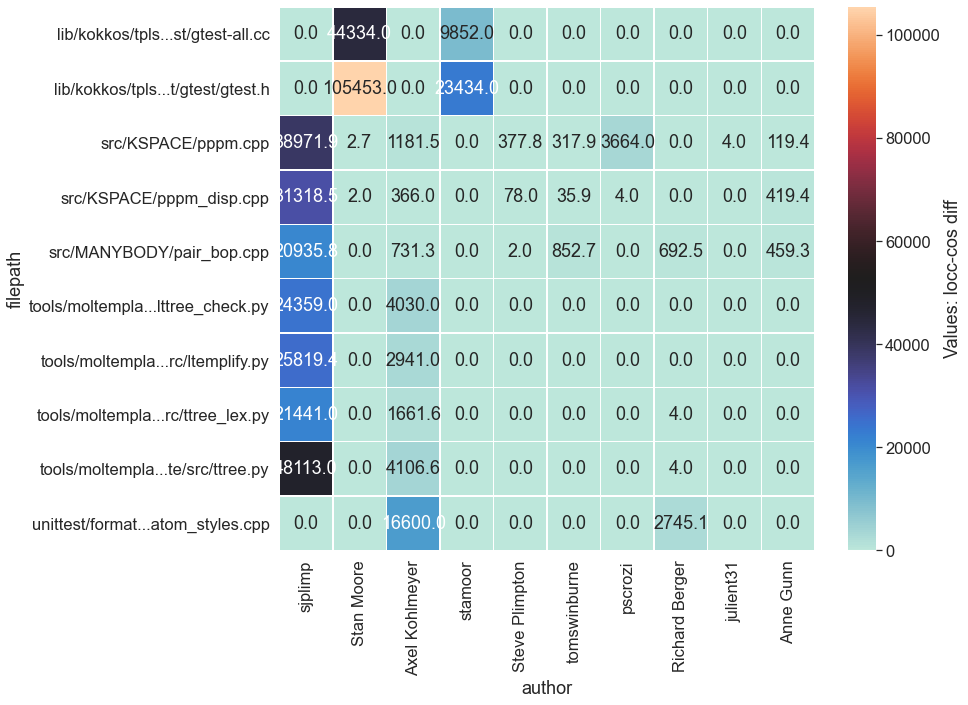

In [26]:
df = vis.commit_data
df['locc-cos diff'] = df['locc']-df['change-size-cos']
d = vis.plot_top_N_heatmap(top_N = 10, value_column='locc-cos diff', my_df=df)

In [27]:
#= vis.plot_top_N_heatmap(20,my_df=diff_df)